# Ethique et responsabilité jeu de donné

<Axes: >

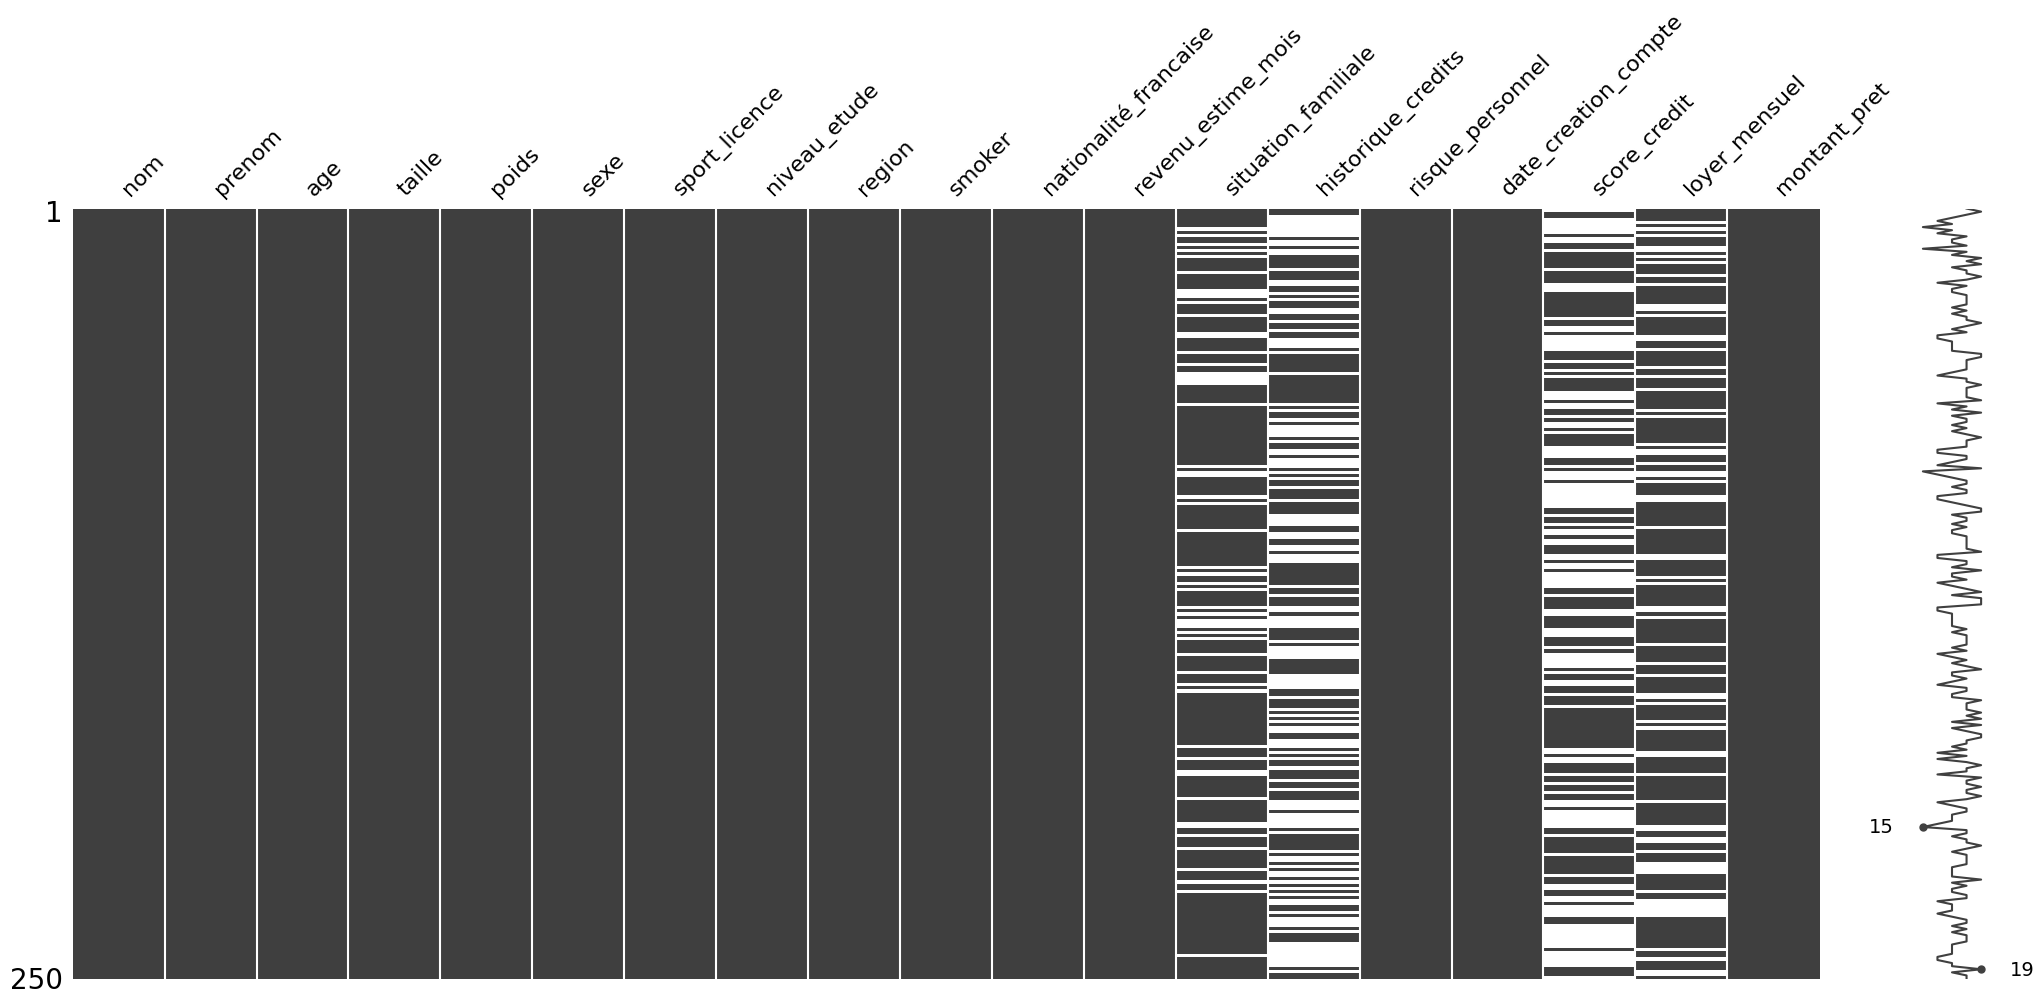

In [4]:
import pandas as pd
from os.path import join as join
collisions = pd.read_csv(join('data', "data-all-68482f115ac04033078508.csv"))
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

In [6]:
collisions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    10000 non-null  object 
 1   prenom                 10000 non-null  object 
 2   age                    10000 non-null  int64  
 3   taille                 10000 non-null  float64
 4   poids                  10000 non-null  float64
 5   sexe                   10000 non-null  object 
 6   sport_licence          10000 non-null  object 
 7   niveau_etude           10000 non-null  object 
 8   region                 10000 non-null  object 
 9   smoker                 10000 non-null  object 
 10  nationalité_francaise  10000 non-null  object 
 11  revenu_estime_mois     10000 non-null  int64  
 12  situation_familiale    7648 non-null   object 
 13  historique_credits     4707 non-null   float64
 14  risque_personnel       10000 non-null  float64
 15  dat

historique_credits et score_credit sont trop vides pour être utiles : 
On les drops


      

In [7]:
collisions.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,46.516500,170.003760,70.064080,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,16.832845,10.006542,15.014911,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,18.000000,119.200000,10.500000,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,75.000000,209.800000,145.200000,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


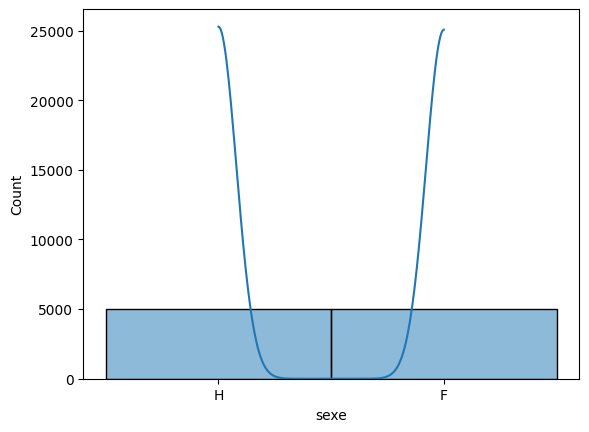

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualisation de la distribution des âges
sns.histplot(collisions['sexe'], kde=True)
plt.show()

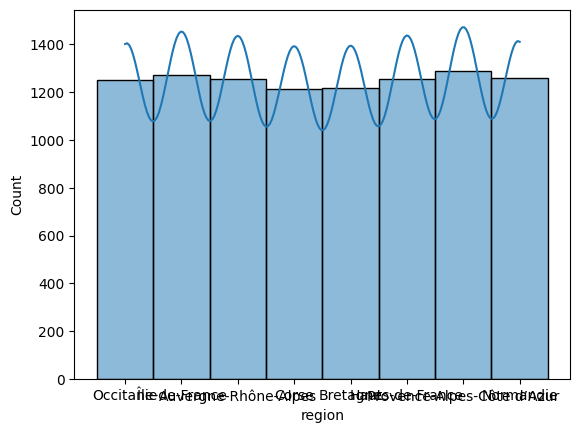

In [9]:
# Visualisation de la distribution des régions
sns.histplot(collisions['region'], kde=True)
plt.show()

# Action sur le dataset : 


## Nettoyage et remplissage des colonnes

```python
    ### On vire car pas RGPD et pas éthique
    collisions.drop(columns=['nom'], inplace=True, errors='ignore')
    collisions.drop(columns=['prenom'], inplace=True, errors='ignore')
    ### On vire car pas éthique
    collisions.drop(columns=['sexe'], inplace=True, errors='ignore')
    collisions.drop(columns=['nationalité_francaise'], inplace=True, errors='ignore')
    ### On vire car trop peu de données
    collisions.drop(columns=['score_credit'], inplace=True, errors='ignore')
    collisions.drop(columns=['historique_credits'], inplace=True, errors='ignore')

    ### on rempli loyer mensuel avec la moyenne 
    collisions['loyer_mensuel'] = collisions['loyer_mensuel'].fillna(collisions['loyer_mensuel'].mean())

    ### filter outlers values
    collisions = collisions[(collisions['poids'] > 30) & (collisions['loyer_mensuel'] > 0)]
```

# On défini les colonnes numériques et catégorielles pour le preprocessing (normalisation et catégorisation)

```python
    numerical_cols = ["age", "taille", "poids", "revenu_estime_mois", "risque_personnel"]    
    # Ajout situation familiales
    categorical_cols = ["sport_licence", "niveau_etude", "region", "smoker", "situation_familiale"]
```